In [82]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [15]:
import pandas as pd
import numpy as np

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [24]:
datas = make_blobs(n_samples=400, 
                   n_features=2,
                   centers=2,
                   cluster_std=1.0,
                   random_state=101)

In [25]:
X, y = datas

In [26]:
# reduire le nombre de dimension
# feauture bruite

np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [27]:
feat = pd.DataFrame(X)

In [28]:
feat

,0,1
0,-0.963587,2.414354
1,-8.367099,-7.169607
2,-1.057406,0.083692
3,-8.896157,-5.240260
4,-11.339263,-7.836222
...,...,...
395,-9.817102,-6.960753
396,-0.049889,3.368772
397,0.655817,2.087837
398,-10.043044,-7.589317


In [29]:
feat = pd.concat([feat,z_noise], axis=1)

In [30]:
feat.columns = ['X1', 'X2', 'X3']

In [31]:
feat.head()

,X1,X2,X3
0,-0.963587,2.414354,2.706850
1,-8.367099,-7.169607,0.628133
2,-1.057406,0.083692,0.907969
3,-8.896157,-5.240260,0.503826
4,-11.339263,-7.836222,0.651118


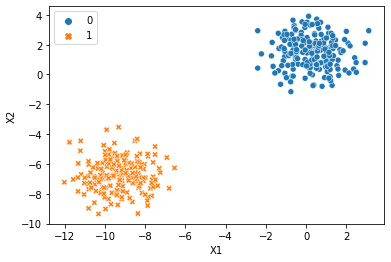

In [46]:
sns.scatterplot(data=feat, x='X1', y="X2",style=y,hue=y)

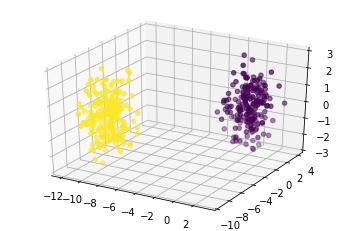

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [ ]:
# 3 --> 2 --> 3

In [69]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [70]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [71]:
autoencoder = Sequential([encoder, decoder])

In [81]:
autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

In [84]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [85]:
autoencoder.fit(scaled_data, scaled_data, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.2238
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1905
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1560
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1488
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1362
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1349
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1338
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1352
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1347
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1408


In [86]:
encoded_2dim = encoder.predict(scaled_data)

In [88]:
encoded_2dim.shape

(400, 2)

In [89]:
scaled_data.shape

(400, 3)

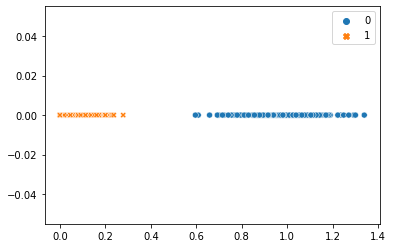

In [92]:
sns.scatterplot(data=encoded_2dim, x=encoded_2dim[:,0], y=encoded_2dim[:,1],style=y,hue=y)

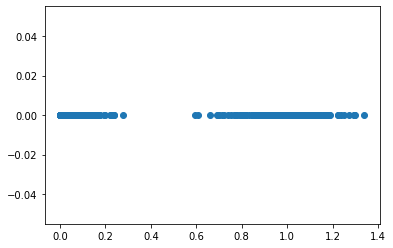

In [93]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1])